# DSE 2018 Part 3: Categorical Variables

In [1]:
# import cell and define data paths
import pandas as pd
import missingno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import scipy
from matplotlib import rc
import warnings
from scipy.stats import probplot
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import seaborn as sns
from sklearn.preprocessing import normalize
from scripts import zillow_data_loader
from statsmodels.formula.api import ols
import statsmodels
import statsmodels.api as sm

warnings.filterwarnings('ignore')
%matplotlib inline

#Set up Data Directories for Zillow data 
data_dir = "~/kaggle/zillow/"
fig_write_dir = "figures/"

#load 2016,2017 merged dataframe
merged = zillow_data_loader.load_train_data(data_dir)
#load 2.9 property test data
test = zillow_data_loader.load_test_data(data_dir)
bound_df = zillow_data_loader.df_percentile_bound(merged,2.5,97.5)
good_num_vars = zillow_data_loader.good_num_vars
pcat_var_list = zillow_data_loader.all_categorical_vars


Shape Of Loaded Merged Zillow Data:  (167888, 63)


## Categorical Variables with less than 2 percent train set missing

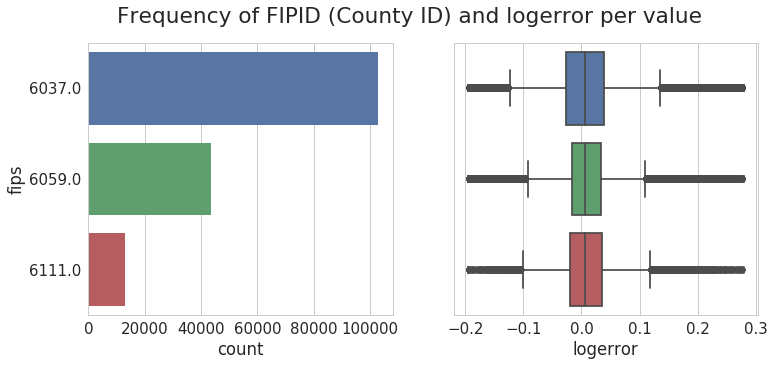

In [2]:
plot_var = 'fips'
out_name = '3.8'
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#fips
#propertylandusetypeid
#regionidcounty
#propertycountylandusecode
bound_df[plot_var]=bound_df[plot_var].astype('category')
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(12, 5),sharey=True)
ax1 =sns.countplot(y=plot_var,data = bound_df,ax=ax1)
ax2 = sns.boxplot(y=plot_var, x="logerror", data=bound_df,ax=ax2)
ax2.get_yaxis().set_visible(False)

out = ax2.get_figure()
plt.suptitle("Frequency of FIPID (County ID) and logerror per value ")
out.savefig(fig_write_dir+'3-8.png', bbox_inches='tight',transparent = True, dpi=300)


                df      sum_sq   mean_sq          F        PR(>F)
C(fips)        2.0    0.217648  0.108824  25.556529  7.993167e-12
Residual  159448.0  678.956273  0.004258        NaN           NaN


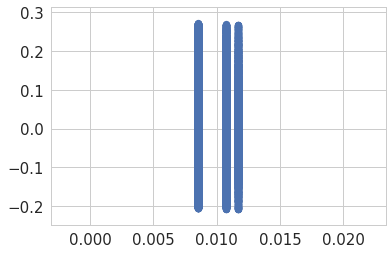

In [3]:
lm = ols('logerror ~ C(fips)',
         data=bound_df).fit()
table = sm.stats.anova_lm(lm, typ=1)

print(table)
#print(lm.summary())
resid = lm.resid
plt.scatter(lm.predict(), resid)

In [1]:
plot_var = 'propertylandusetypeid'

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#fips
#propertylandusetypeid
#regionidcounty
#propertycountylandusecode
bound_df[plot_var]=bound_df[plot_var].astype('category')
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(12, 5),sharey=True)
sns.countplot(y=plot_var,data = bound_df,ax=ax1)
sns.boxplot(y=plot_var, x="logerror",data=bound_df,ax=ax2)
#sns.boxplot(y=plot_var, x="logerror",data=bound_df,ax=ax2)
ax2.get_yaxis().set_visible(False)
#ax1.set_xscale("log", nonposx='clip')
fig.show()
plt.suptitle("Frequency of property land type Id and logerror")
out = ax2.get_figure()
out.savefig(fig_write_dir+'3-9.png', bbox_inches='tight',transparent = True, dpi=300)


NameError: name 'sns' is not defined

                                df      sum_sq   mean_sq       F        PR(>F)
C(propertylandusetypeid)      12.0    0.441272  0.036773  8.6381  1.081153e-16
Residual                  159438.0  678.732649  0.004257     NaN           NaN


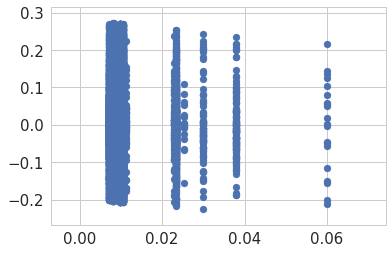

In [5]:
lm = ols('logerror ~ C(propertylandusetypeid)',
         data=bound_df).fit()
table = sm.stats.anova_lm(lm, typ=1)

print(table)
#print(lm.summary())
resid = lm.resid
plt.scatter(lm.predict(), resid)
out = ax2.get_figure()
out.savefig(fig_write_dir+'3-9.png', bbox_inches='tight',transparent = True, dpi=300)

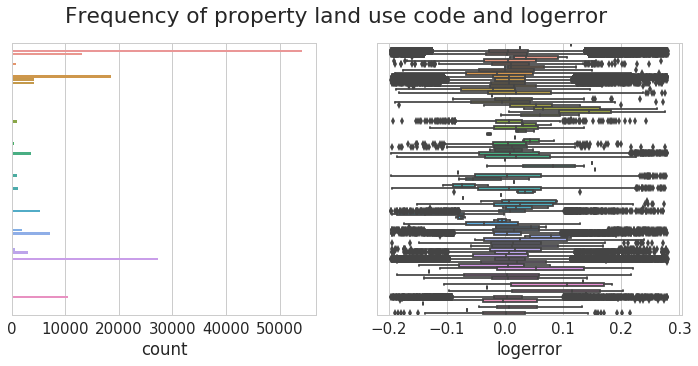

In [6]:
plot_var = 'propertycountylandusecode'

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

bound_df[plot_var].value_counts().sort_index(ascending=False)
bound_df[plot_var]=bound_df[plot_var].astype('category')
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(12, 5),sharey=True)
sns.countplot(y=plot_var,data = bound_df,ax=ax1)
#sns.violinplot(y=plot_var, x="logerror", bw=.01,data=bound_df,ax=ax2)
sns.boxplot(y=plot_var, x="logerror",data=bound_df,ax=ax2)
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
#ax1.set_xscale("log", nonposx='clip')
fig.show()
plt.suptitle("Frequency of property land use code and logerror")
out = ax2.get_figure()
out.savefig(fig_write_dir+'3-10.png', bbox_inches='tight',transparent = True, dpi=300)


                                    df      sum_sq   mean_sq         F  \
C(propertycountylandusecode)      84.0    2.340756  0.027866  6.561277   
Residual                      159365.0  676.832957  0.004247       NaN   

                                    PR(>F)  
C(propertycountylandusecode)  1.160207e-69  
Residual                               NaN  


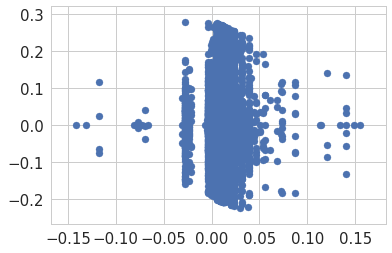

In [7]:
lm = ols('logerror ~ C(propertycountylandusecode)',
         data=bound_df).fit()
table = sm.stats.anova_lm(lm, typ=1)

print(table)
#print(lm.summary())
resid = lm.resid
plt.scatter(lm.predict(), resid)

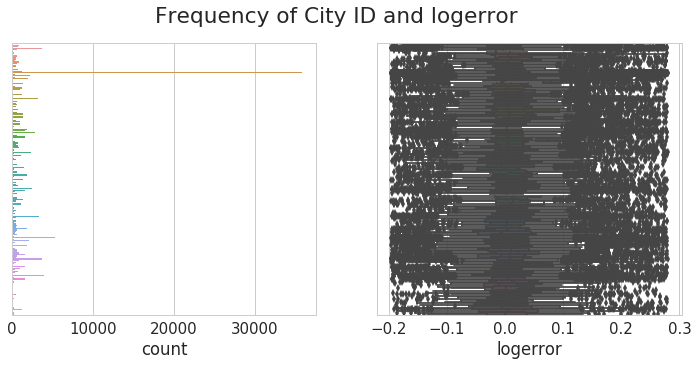

In [8]:
plot_var = 'regionidcity'

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

bound_df[plot_var].value_counts().sort_index(ascending=False)
bound_df[plot_var]=bound_df[plot_var].astype('category')
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(12, 5),sharey=True)
sns.countplot(y=plot_var,data = bound_df,ax=ax1)
#sns.violinplot(y=plot_var, x="logerror", bw=.01,data=bound_df,ax=ax2)
sns.boxplot(y=plot_var, x="logerror",data=bound_df,ax=ax2)
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
#ax1.set_xscale("log", nonposx='clip')
fig.show()
plt.suptitle("Frequency of City ID and logerror")
out = ax2.get_figure()
out.savefig(fig_write_dir+'3-11.png', bbox_inches='tight',transparent = True, dpi=300)


                       df      sum_sq   mean_sq        F         PR(>F)
C(regionidcity)     177.0    5.267562  0.029760  7.00635  4.016728e-158
Residual         156115.0  663.115513  0.004248      NaN            NaN


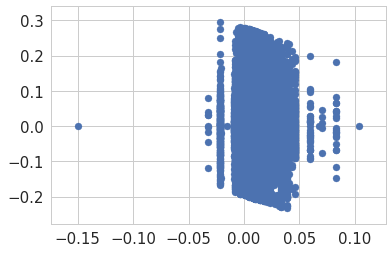

In [9]:
lm = ols('logerror ~ C(regionidcity)',
         data=bound_df).fit()
table = sm.stats.anova_lm(lm, typ=1)

print(table)
#print(lm.summary())
resid = lm.resid
plt.scatter(lm.predict(), resid)

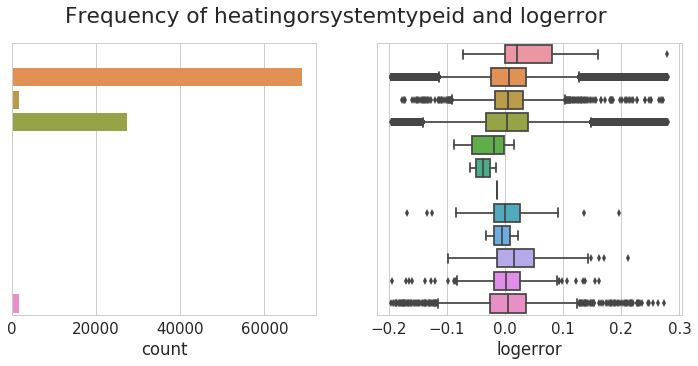

In [10]:
plot_var = 'heatingorsystemtypeid'
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

bound_df[plot_var].value_counts().sort_index(ascending=False)
bound_df[plot_var]=bound_df[plot_var].astype('category')
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(12, 5),sharey=True)
sns.countplot(y=plot_var,data = bound_df,ax=ax1)
#sns.violinplot(y=plot_var, x="logerror", bw=.01,data=bound_df,ax=ax2)
sns.boxplot(y=plot_var, x="logerror",data=bound_df,ax=ax2)
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
#ax1.set_xscale("log", nonposx='clip')
fig.show()
plt.suptitle("Frequency of heatingorsystemtypeid and logerror")
out = ax2.get_figure()
out.savefig(fig_write_dir+'3-12.png', bbox_inches='tight',transparent = True, dpi=300)


                                df      sum_sq   mean_sq         F   PR(>F)
C(heatingorsystemtypeid)      11.0    0.144607  0.013146  2.945117  0.00066
Residual                  100274.0  447.590521  0.004464       NaN      NaN


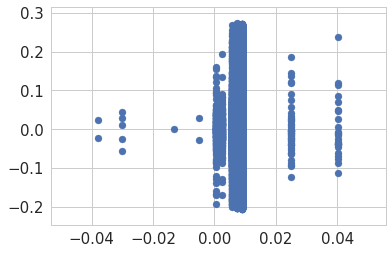

In [11]:
lm = ols('logerror ~ C(heatingorsystemtypeid)',
         data=bound_df).fit()
table = sm.stats.anova_lm(lm, typ=1)

print(table)
#print(lm.summary())
resid = lm.resid
plt.scatter(lm.predict(), resid)

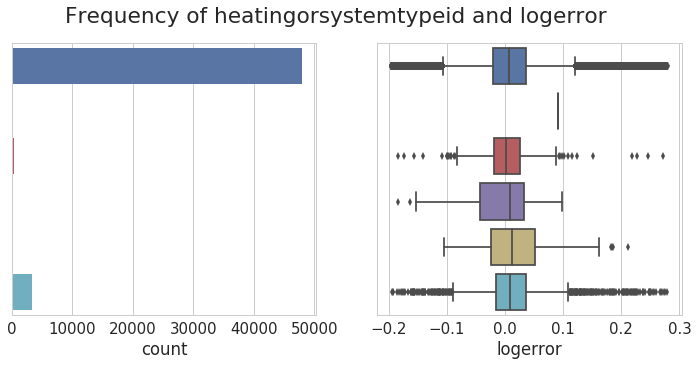

In [12]:
plot_var = 'airconditioningtypeid'
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

bound_df[plot_var].value_counts().sort_index(ascending=False)
bound_df[plot_var]=bound_df[plot_var].astype('category')
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(12, 5),sharey=True)
sns.countplot(y=plot_var,data = bound_df,ax=ax1)
#sns.violinplot(y=plot_var, x="logerror", bw=.01,data=bound_df,ax=ax2)
sns.boxplot(y=plot_var, x="logerror",data=bound_df,ax=ax2)
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
#ax1.set_xscale("log", nonposx='clip')
plt.suptitle("Frequency of heatingorsystemtypeid and logerror")
out = ax2.get_figure()
out.savefig(fig_write_dir+'3-12.png', bbox_inches='tight',transparent = True, dpi=300)


                               df      sum_sq   mean_sq         F    PR(>F)
C(airconditioningtypeid)      5.0    0.084138  0.016828  4.428169  0.000493
Residual                  51759.0  196.690671  0.003800       NaN       NaN


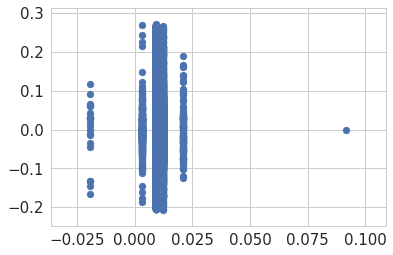

In [13]:
lm = ols('logerror ~ C(airconditioningtypeid)',
         data=bound_df).fit()
table = sm.stats.anova_lm(lm, typ=1)

print(table)
#print(lm.summary())
resid = lm.resid
plt.scatter(lm.predict(), resid)